# Ridge and Lasso Regression

In [2]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,SLP,H,W,V,VM,PM 2.5
0,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
# Splitting into independent and dependent

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
y.isnull().sum()

2

In [6]:
## Replacing the null values with median
y.fillna(y.median(),inplace=True)

In [7]:
### Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Implementation

## Ridge

In [8]:
## Ridge

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-4,1e-2,1,2,4,6,8,9,10,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 0.0001, 0.01, 1, 2, 4, 6, 8, 9,
                                   10, 100]},
             scoring='neg_mean_squared_error')

In [10]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-3311.9732655718994


## Lasso

In [11]:
from sklearn.linear_model import Lasso

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-4,1e-2,1,2,4,6,8,9,10,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e+06, tolerance: 5.720e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.410e+06, tolerance: 6.380e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 0.0001, 0.01, 1, 2, 4, 6, 8, 9,
                                   10, 100]},
             scoring='neg_mean_squared_error')

In [12]:
print(lasso_regressor.best_params_)

{'alpha': 4}


In [13]:
print(lasso_regressor.best_score_)

-3318.8501533538088


### Model evaluation Lasso

In [15]:
prediction=lasso_regressor.predict(X_test)

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

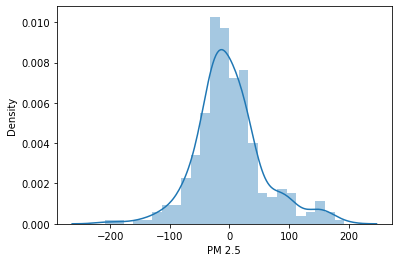

In [16]:
sns.distplot(y_test-prediction)

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM 2.5'>

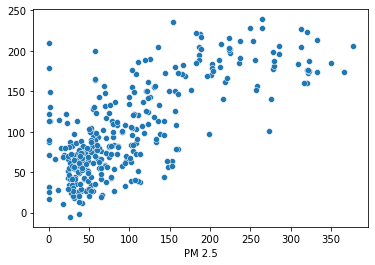

In [17]:
sns.scatterplot(y_test,prediction)

In [22]:
### metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('MAE: {}'.format(mean_absolute_error(y_test,prediction)))
print('MSE: {}'.format(mean_squared_error(y_test,prediction)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,prediction))))

MAE: 41.94779924923308
MSE: 3319.1241556319105
RMSE: 57.61184041177569
